## Optimising Decision Tree Classifiers - Tumor DataSet 

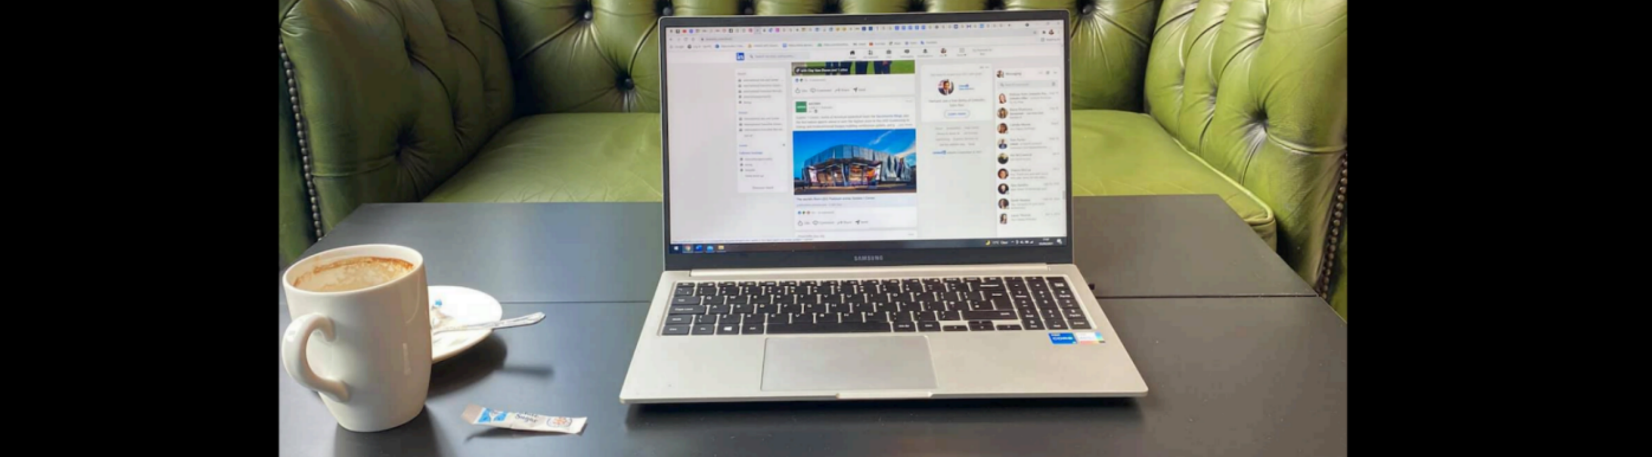

### Hemant Thapa

#### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

#### Importing Dataset

In [3]:
#loading tumor dataset
df = pd.read_csv('tumor.csv')

Each observation in this dataset contains laboratory test results about a tumour sample, such as clump or shape characteristics. Based on these laboratory test results, we aim to construct a classification model to predict whether this tumour sample is malignant (cancerous) or benign. The target variable is our column class and rest are features.

In [4]:
df[:5]

,Unnamed: 0,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,0,5,1,1,1,2,1,3,1,1,0
1,1,5,4,4,5,7,10,3,2,1,0
2,2,3,1,1,1,2,2,3,1,1,0
3,3,6,8,8,1,3,4,3,7,1,0
4,4,4,1,1,3,2,1,3,1,1,0


#### Pre Processing 

In [5]:
#checking shape
df.shape

(683, 11)

In [6]:
#checking size
df.size

7513

In [7]:
#checking data types
df.dtypes

Unnamed: 0     int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


- `clump`: This column represents the clump thickness of the tumor, which indicates how compact the cells are within the tumor.

- `unifsize`: It represents the uniformity of cell size within the tumor, indicating how similar or varied the sizes of the tumor cells are.

- `unifshape`: This column signifies the uniformity of cell shape within the tumor, indicating how similar or varied the shapes of the tumor cells are.

- `margadh`: This column indicates the marginal adhesion of tumor cells, measuring how well the tumor cells stick together or to surrounding tissue.

- `singepisize`: It measures the size of single epithelial cells within the tumor, indicating the size of individual cells.

- `barenuc`: This column represents the presence or absence of bare nuclei in the tumor, which is an important feature.

- `blandchrom`: It represents the level of chromatin content within the cell nucleus. Chromatin changes can be indicative of abnormalities.

- `normnucl`: This column indicates the presence or absence of normal nucleoli in the tumor cells, which are involved in ribosome production.

- `mit`: It represents the number of mitoses (cell divisions) occurring in the tumor cells, which can indicate tumor growth rate.

- `class`: This column contains the target variable, specifying whether the tumor sample is malignant (cancerous) or benign (non-cancerous). This is the variable you want to predict in a classification model.

All of our columns is integer 64 data types, 64-bit integer allows you to work with very large integer values that wouldn't fit within a 32-bit integer, which has a more limited range.

In [9]:
#checking missing values
df.isnull().sum()

Unnamed: 0     0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

We do not have any missing values in our dataset. 

In [10]:
#converting columns to smaller case
df.columns = df.columns.str.lower()

In [11]:
df.columns

Index(['unnamed: 0', 'clump', 'unifsize', 'unifshape', 'margadh',
       'singepisize', 'barenuc', 'blandchrom', 'normnucl', 'mit', 'class'],
      dtype='object')

In [12]:
#removing unncessary columns
df.drop(columns='unnamed: 0', inplace=True)

In [13]:
df.tail()

,clump,unifsize,unifshape,margadh,singepisize,barenuc,blandchrom,normnucl,mit,class
678,3,1,1,1,3,2,1,1,1,0
679,2,1,1,1,2,1,1,1,1,0
680,5,10,10,3,7,3,8,10,2,1
681,4,8,6,4,3,4,10,6,1,1
682,4,8,8,5,4,5,10,4,1,1


#### Feature Engineering 

In [14]:
#selecting target 
y = df['class'].values
y[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [15]:
#selecting features
X = df[['clump', 'unifsize', 'unifshape', 'margadh', 'singepisize', 'barenuc', 'blandchrom', 'normnucl', 'mit']].values.reshape(-9, 9)

In [16]:
X[:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [17]:
#splitting data into trian and test, 80 percent trian and 20 percent test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Model Selection 

In [18]:
#classification model
clf = DecisionTreeClassifier(random_state=0)

In [19]:
#training classification model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
#predicting 
preds = clf.predict(X_test)

#### Post Processing 

In [21]:
#class to calculate metrics
class EvaluationMetrics:
    def __init__(self, y_true, y_predicted):
        self.y_true = y_true
        self.y_predicted = y_predicted
    #method to fit all metrics
    def fit(self):
        #declaring dictonary to store all metrics
        result = {}
        #accuracy 
        result['accuracy'] = accuracy_score(self.y_true, self.y_predicted)
        precision, recall, f_beta, i = precision_recall_fscore_support(self.y_true, self.y_predicted, average='binary')
        #recall
        result['recall'] = recall
        #precision
        result['precision'] = precision
        #f1 score
        result['f1 score'] = f_beta
        return result

In [22]:
#creating an instance of an object to calculate metrics
evaluation_report = EvaluationMetrics(y_test, preds).fit()
evaluation_report

{'accuracy': 0.9343065693430657,
 'recall': 0.94,
 'precision': 0.8867924528301887,
 'f1 score': 0.912621359223301}


- **Accuracy**: Accuracy is a measure of how many predictions made by the model are correct out of the total predictions.

  Formula: 

  ![Accuracy Formula](https://latex.codecogs.com/svg.image?Accuracy&space;=&space;\frac{TP&space;&plus;&space;TN}{TP&space;&plus;&space;TN&space;&plus;&space;FP&space;&plus;&space;FN})

  Where:
  - TP: True Positives (correctly predicted positive cases)
  - TN: True Negatives (correctly predicted negative cases)
  - FP: False Positives (incorrectly predicted positive cases)
  - FN: False Negatives (incorrectly predicted negative cases)

- **Recall (Sensitivity)**: Recall measures the ability of the model to correctly identify positive cases out of all actual positive cases.

  Formula: 

  ![Recall Formula](https://latex.codecogs.com/svg.image?Recall&space;=&space;\frac{TP}{TP&space;&plus;&space;FN})


- **Precision**: Precision measures the accuracy of positive predictions made by the model, indicating how many of the positive predictions are actually correct.

  Formula: 

  ![Precision Formula](https://latex.codecogs.com/svg.image?Precision&space;=&space;\frac{TP}{TP&space;&plus;&space;FP})


- **F1 Score**: The F1 Score is the harmonic mean of precision and recall. It balances both precision and recall into a single metric.

  Formula: 

  ![F1 Score Formula](https://latex.codecogs.com/svg.image?F1&space;Score&space;=&space;\frac{2&space;\cdot&space;Precision&space;\cdot&space;Recall}{Precision&space;&plus;&space;Recall})





| Metric     | Formula                                                                                  | Value      |
|------------|------------------------------------------------------------------------------------------|------------|
| **Accuracy**  | ![Accuracy Formula](https://latex.codecogs.com/svg.image?Accuracy&space;=&space;\frac{TP&space;&plus;&space;TN}{TP&space;&plus;&space;TN&space;&plus;&space;FP&space;&plus;&space;FN}) | 0.9343 (93.43%) |
| **Recall (Sensitivity)** | ![Recall Formula](https://latex.codecogs.com/svg.image?Recall&space;=&space;\frac{TP}{TP&space;&plus;&space;FN}) | 0.94 (94%) |
| **Precision** | ![Precision Formula](https://latex.codecogs.com/svg.image?Precision&space;=&space;\frac{TP}{TP&space;&plus;&space;FP}) | 0.8868 (88.68%) |
| **F1 Score**  | ![F1 Score Formula](https://latex.codecogs.com/svg.image?F1&space;Score&space;=&space;\frac{2&space;\cdot&space;Precision&space;\cdot&space;Recall}{Precision&space;&plus;&space;Recall}) | 0.9126 (9nd recall.


In [23]:
#class to perform decision plot
class DecisionPlot:
    def __init__(self, model, feature_names):
        self.model = model
        self.feature_names = feature_names
    #method to plot
    def plot(self):
        plt.subplots(figsize=(25, 20))
        #selecting model and features_names
        tree.plot_tree(self.model, feature_names=self.feature_names, filled=True)
        plt.show()

In [24]:
#features name through iterating columns
feature_names = df[df.columns]

In [25]:
#droping unncessary columns
feature_names.drop(columns='class', inplace=True)

In [26]:
feature_names[:5]

,clump,unifsize,unifshape,margadh,singepisize,barenuc,blandchrom,normnucl,mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [27]:
#selecting features names
feature_names.columns.values

array(['clump', 'unifsize', 'unifshape', 'margadh', 'singepisize',
       'barenuc', 'blandchrom', 'normnucl', 'mit'], dtype=object)

#### Plotting Decision Tree

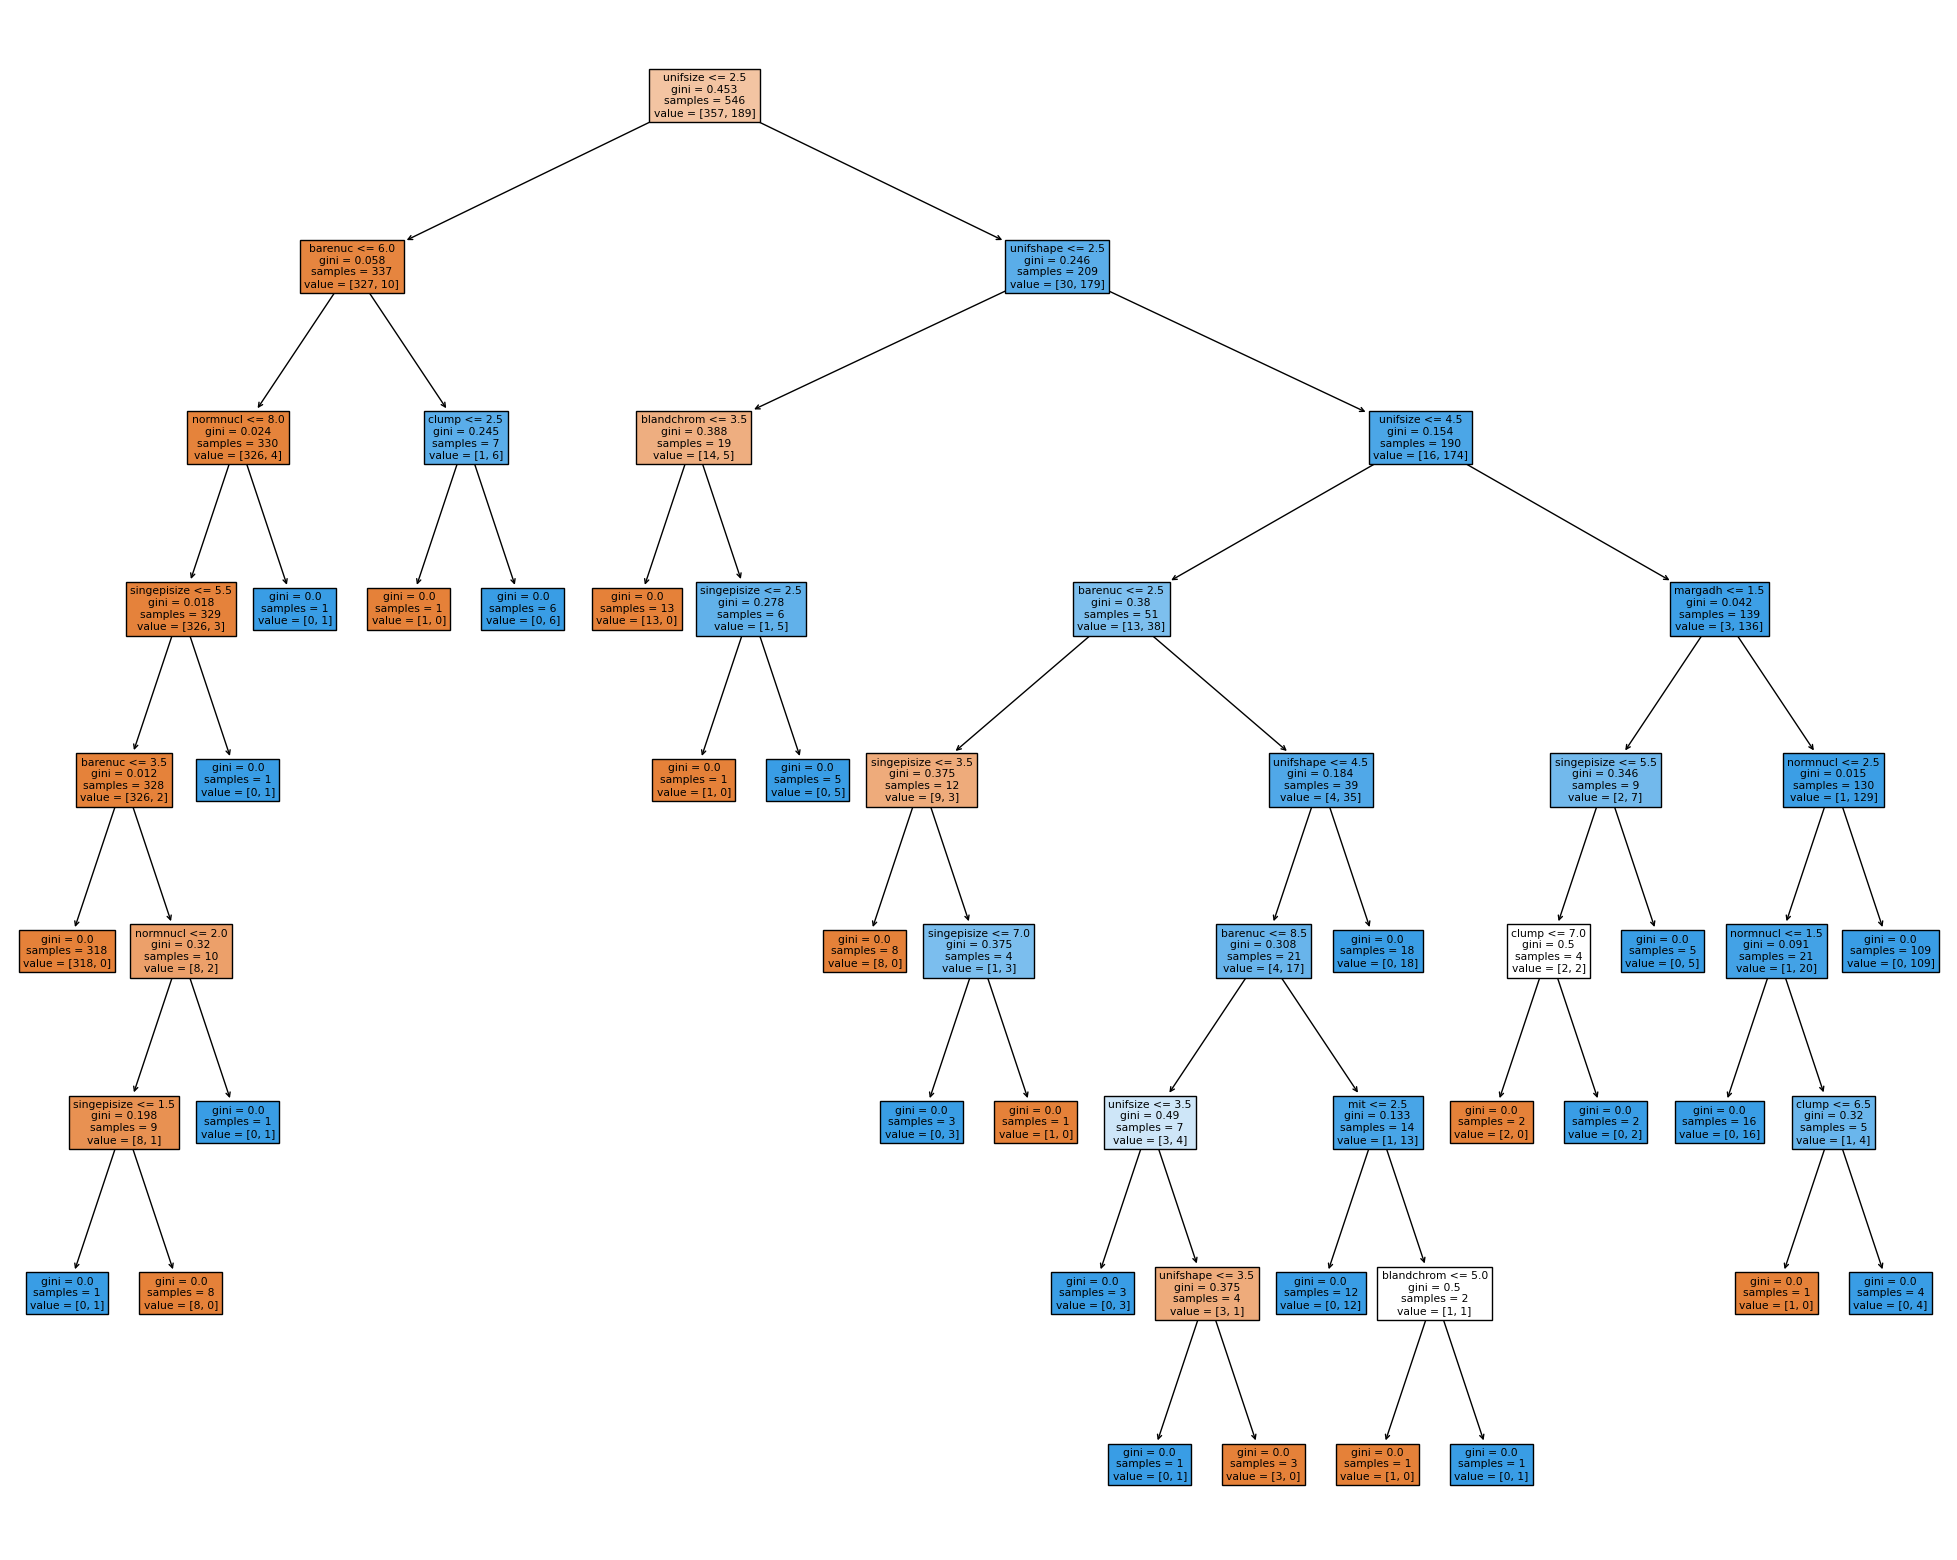

In [28]:
#fitting plot
plot_decision_tree = DecisionPlot(clf, feature_names=feature_names.columns.values).plot()

- Root Node: This is the starting point of the decision. It represents the entire dataset, which gets split based on a feature that results in the best separation according to certain criteria like Gini impurity, entropy in classification tasks, or variance reduction in regression.

- Internal Nodes: These nodes test a condition on a single feature. Based on the outcome, the data is split into sub-nodes.

- Branches: A branch represents a decision rule leading to the next node.

- Leaf Nodes/Terminal Nodes: These nodes represent the outcome of the decision path followed from the root to that leaf. In classification, it represents a class label; in regression, it represents a continuous outcome.

#### The values on the nodes and branches typically include:

- Condition: This is the rule applied to split the data.

- Gini/Entropy or Variance: Measures of node impurity or the homogeneity of the data within the node. In classification, a lower Gini/Entropy suggests a better split, while in regression, lower variance is better.

- Samples: The number of observations in the node.

- Value: The distribution of the samples across different classes, or the average in case of regression.

#### Hyperparameters Tunning 

In [29]:
#final model for classification through grid search
clf_optimised_model = DecisionTreeClassifier(random_state=42)

In [30]:
#defining parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 15, 20],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

In [31]:
#performing grid search
grid_search = GridSearchCV(clf_optimised_model, param_grid, cv=5, scoring='f1', verbose=1)

In [32]:
#training model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='f1', verbose=1)

In [33]:
#finding best parameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [34]:
#fitting best parameters and training model
classification_model = DecisionTreeClassifier(**best_params)
classification_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       min_samples_leaf=4)

In [35]:
#performing predictions
preds = classification_model.predict(X_test)

In [36]:
#evaluating overall best metrics
evaluation_report = EvaluationMetrics(y_test, preds).fit()
evaluation_report

{'accuracy': 0.9781021897810219,
 'recall': 1.0,
 'precision': 0.9433962264150944,
 'f1 score': 0.970873786407767}

| Metric     | Formula                                                                                  | Value      |
|------------|------------------------------------------------------------------------------------------|------------|
| **Accuracy**  | ![Accuracy Formula](https://latex.codecogs.com/svg.image?Accuracy&space;=&space;\frac{TP&space;&plus;&space;TN}{TP&space;&plus;&space;TN&space;&plus;&space;FP&space;&plus;&space;FN}) | 0.9781 (97.81%) |
| **Recall (Sensitivity)** | ![Recall Formula](https://latex.codecogs.com/svg.image?Recall&space;=&space;\frac{TP}{TP&space;&plus;&space;FN}) | 1.0 (100%) |
| **Precision** | ![Precision Formula](https://latex.codecogs.com/svg.image?Precision&space;=&space;\frac{TP}{TP&space;&plus;&space;FP}) | 0.9434 (94.34%) |
| **F1 Score**  | ![F1 Score Formula](https://latex.codecogs.com/svg.image?F1&space;Score&space;=&space;\frac{2&space;\cdot&space;Precision&space;\cdot&space;Recall}{Precision&space;&plus;&space;Recall}) | 0.9709 (97.09%) |


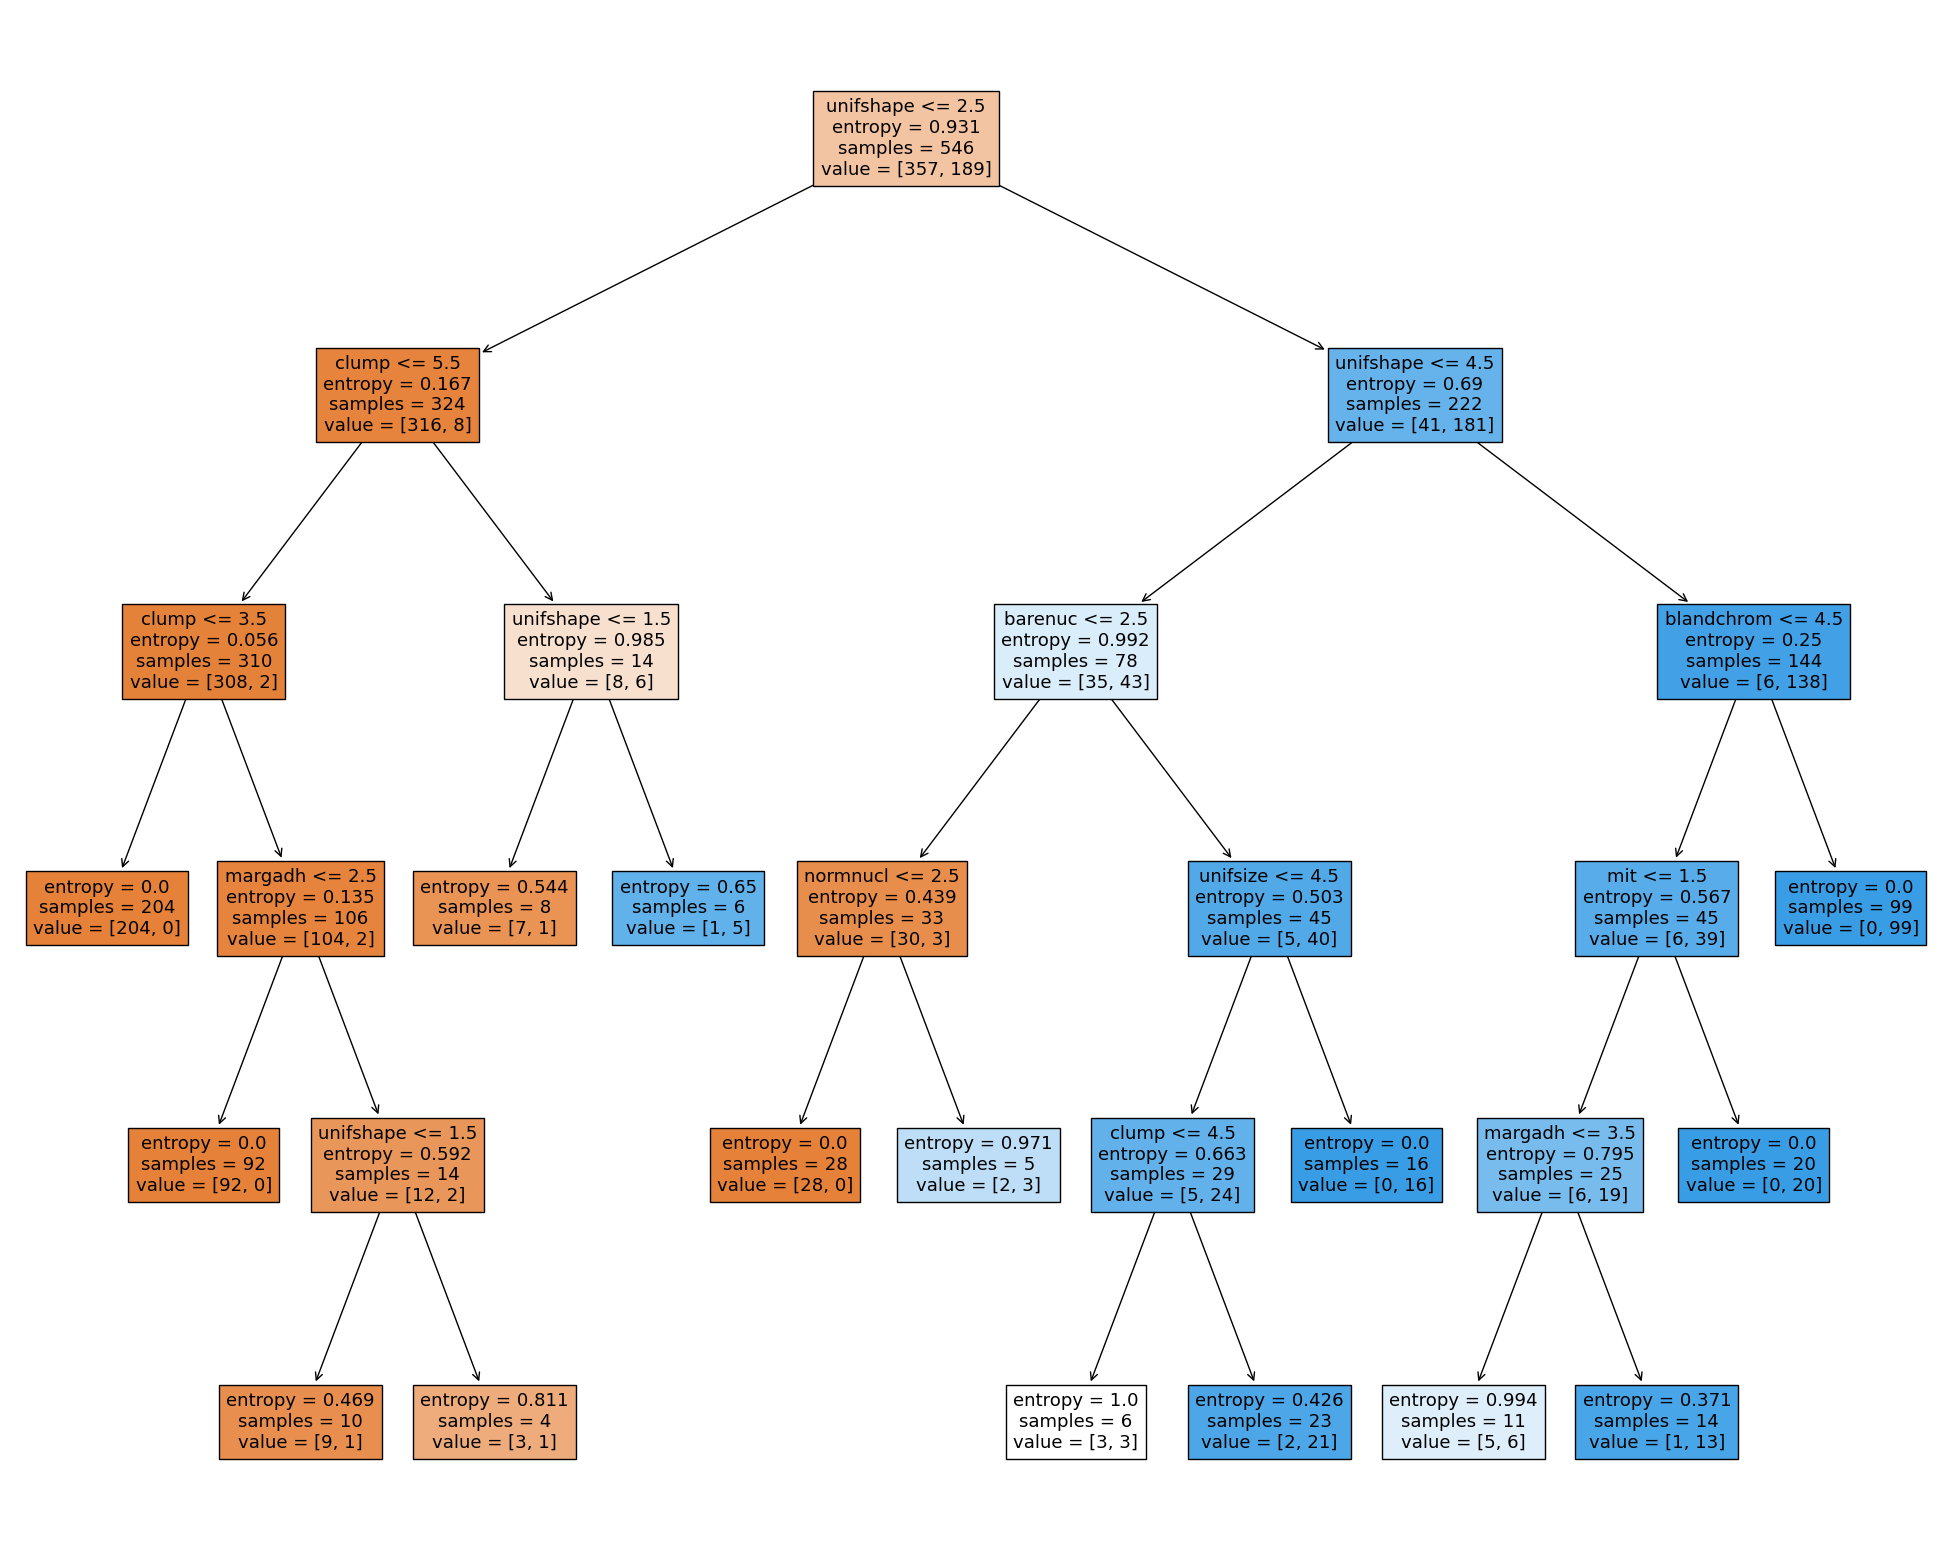

In [37]:
#final decision plot
plot_decision_tree = DecisionPlot(classification_model, feature_names=feature_names.columns.values).plot()

#### Conclusion: 

The final model achieved an accuracy of 97.81%, recall of 100%, precision of 94.34%, and an F1 score of 97.09%, indicating a high level of predictive performance. The classifier's performance was optimised through careful tuning of hyperparameters, resulting in high accuracy and precision. The decision tree visualization offered an explanatory insight into the classifier's decision-making process, demonstrating its potential as a tool for aiding medical diagnoses. This case study underscores the importance of model optimization in achieving reliable predictive analytics in healthcare.

#### References

[Scikit-Learn Decision Trees Documentation](https://scikit-learn.org/stable/modules/tree.html)